<a href="https://colab.research.google.com/github/shivamrahane/additional-projects/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

### **Import Dependancy**

In [ ]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Collection**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/datasets/ML datasets/MCopy of movies.csv')

In [ ]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
features = ['genres','keywords','tagline','cast','director']

In [ ]:
for feature in features:
  df[feature] = df[feature].fillna('')

In [ ]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### **Combine features**

In [ ]:
co_f = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [ ]:
print(co_f)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


## **Converting text data into num data**

In [ ]:
vector = TfidfVectorizer()

In [ ]:
feature_vector = vector.fit_transform(co_f)

In [ ]:
print(feature_vector)

  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.24713765026964
  (4801, 17266)	0.28860981849329476
  (4801, 13835)	0.27870029291200094
  (4801, 13175)	0.28860981849329476
  (4801, 171

In [ ]:
df.shape

(4803, 24)

## **Similarity scores using cosine similarity**

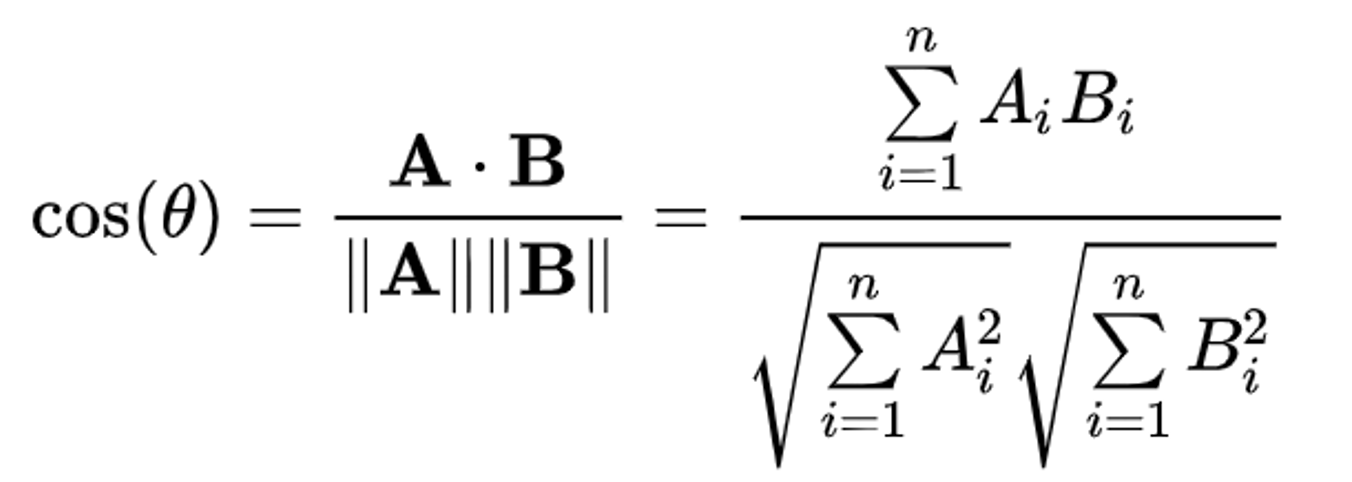

In [ ]:
similarity = cosine_similarity(feature_vector)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
similarity.shape

(4803, 4803)

In [ ]:
# kgf
# omg

In [ ]:
#       kgf       omg
# kgf   1       0.5
# omg   0.5     1

## **Getting movie name from user**

In [ ]:
movie_name = 'iron man'

### **creating a list with all the movie names given in the dataset**

In [ ]:
list_of_all_title = df['title'].tolist()
print(list_of_all_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

### **Finding close match for the movie name given by user**

In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [ ]:
# finding the index name of the movie with title
index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

68


In [ ]:
df.head(69).tail(1)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
68,68,140000000,Action Science Fiction Adventure,http://www.ironmanmovie.com/,1726,middle east arms dealer malibu marvel comic su...,en,Iron Man,"After being held captive in an Afghan cave, bi...",120.725053,...,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Heroes aren't born. They're built.,Iron Man,7.4,8776,Robert Downey Jr. Terrence Howard Jeff Bridges...,"[{'name': 'Sarah Finn', 'gender': 1, 'departme...",Jon Favreau


### **GETTING THE SIMILER MOVIES**

In [ ]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224325), (3, 0.006468756104392058), (4, 0.03268943310073387), (5, 0.013907256685755475), (6, 0.07692837576335508), (7, 0.23944423963486416), (8, 0.007882387851851008), (9, 0.07599206098164224), (10, 0.07536074882460439), (11, 0.01192606921174529), (12, 0.013707618139948932), (13, 0.01237607492508997), (14, 0.09657127116284187), (15, 0.007286271383816743), (16, 0.22704403782296806), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799916), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549735), (25, 0.0), (26, 0.21566241096831162), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938901), (30, 0.0807734659476981), (31, 0.3146705244947752), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.0353500906748656), (36, 0.03185325269937554), (37, 0.008024326882532318), (38

In [ ]:
print(len(similarity_score))

4803


### **Sort similar_score**

In [ ]:
sorted_movie_score = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_movie_score)

[(68, 1.0), (79, 0.40890433998005965), (31, 0.3146705244947752), (7, 0.23944423963486416), (16, 0.22704403782296806), (26, 0.21566241096831162), (85, 0.20615862984665334), (182, 0.19573956139611612), (511, 0.16702973947860683), (3623, 0.1609246088135586), (64, 0.1529992413944514), (203, 0.1481866794866512), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826292), (46, 0.14216268867232232), (169, 0.1380947013224906), (1740, 0.1362438264169076), (94, 0.13616819579029016), (788, 0.13305895074229218), (126, 0.13263982780511063), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910509), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483318), (661, 0.11719294096248462), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661255), (1553, 0.10797822171513263), (1451, 0.10784939497470701), (242, 0.10630339022327012), (618, 0.10254692635368

### **Find top 30 movies based on given user**

In [ ]:
df[df.index==7]['title'].values[0]

'Avengers: Age of Ultron'

In [ ]:
print('Movies suggested for you : \n')

i = 1
for movie in sorted_movie_score:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<31):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow
30 . The Amazing Spider-Man 2


## **Movie Recommendation Sytem**

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_title = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_movie_score = sorted(similarity_score, key = lambda x:x[1], reverse = True)


print('Movies suggested for you : \n')

i = 1
for movie in sorted_movie_score:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<31):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : bat man
Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give
30 . Reds
